# Background
This study aims to understand how similar or dissimilar the TNF gene is across humans and primates, and whether other mammals have a similar genetic disposition to humans and primates. A total of 50 TNF sequences will be obtained, 25 of which will be primates, and the other 25 of which will be mammals from other taxa. A multiple sequence alignment (MSA) will be built to infer the presence of ancestral relationships between the sequences. A phylogenetic tree will also be drawn to visually represent the evolutionary relationships among the species analyzed. Furthermore, these sequences will be trained through a Hidden Markov Model (HMM) that then later computes a log-Viterbi score. These analyses will help determine the similarity between the species among the primate clade and mammals from other taxa. Because humans are most similar to primates, it is to be expected that the MSA will align similarly and result in low log-Viterbi scores. Since primates may not be genetically similar with other mammals, it is to be expected that there can be a significant difference between the MSA alignments and could result in much higher log-Viterbi scores. Phenotypically and genetically similar animals was hypothesized to have genotypically similar TNF genes. 

#Handle Dependencies

## Install Dependencies

In [ ]:
pip install biopython

     |████████████████████████████████| 2.3MB 6.9MB/s 


In [ ]:
!sudo apt-get install -y clustalw

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  clustalx seaview
The following NEW packages will be installed:
  clustalw
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 281 kB of archives.
After this operation, 809 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 clustalw amd64 2.1+lgpl-5 [281 kB]
Fetched 281 kB in 1s (414 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package clustalw.
(Reading database

##Import Dependencies


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from Bio import SeqIO, SearchIO, Entrez, AlignIO, Phylo
from Bio.Align.Applications import ClustalwCommandline, MuscleCommandline
Entrez.email = "yvonna.leung@sjsu.edu"  # Need to tell NCBI who you are

##Collect Sequences

In [ ]:
# Gets Fasta file for each sequence using NCBI accession number.
def get_fasta(NCBI_id, seq_start, seq_stop):
  print("Getting Fasta file for:", NCBI_id)
  handle = Entrez.efetch(db="nuccore", id= NCBI_id, rettype="fasta", seq_start=seq_start, seq_stop=seq_stop)
  print(handle.url)
  genbank_record = SeqIO.read(handle, "fasta")
  return genbank_record

def get_sequence(NCBI_id):
  return get_fasta(NCBI_id).seq

# Basic dataset consists of 25 primates. TNF sequence is in the start and stop region of the sequence.
def get_basic_set():
  l = []
  l.append(get_fasta("NG_007462", 4993, 7764))
  l.append(get_fasta("NC_041757", 137934540, 137937146))
  l.append(get_fasta("NC_036885", 30973796, 30977728))
  l.append(get_fasta("NC_036909", 31862568, 31865345))
  l.append(get_fasta("NC_048386", 35786290, 35788191))
  l.append(get_fasta("NC_044402", 52604482, 52607247))
  l.append(get_fasta("NW_012003394", 351660, 354591))
  l.append(get_fasta("NW_022681455", 31615357, 31618475))
  l.append(get_fasta("NW_022437128", 419840, 423140))
  l.append(get_fasta("NW_016820117", 442773, 445553))
  l.append(get_fasta("NC_033665", 1462712, 1465617))
  l.append(get_fasta("NW_012150019", 1286304, 1289063))
  l.append(get_fasta("NW_018508880", 631021, 634098))
  l.append(get_fasta("NW_012011989", 775591, 778797))
  l.append(get_fasta("NC_044552", 25134100, 25136912))
  l.append(get_fasta("NW_024100919", 131130662, 131133756))
  l.append(get_fasta("NW_022611662", 30018474, 30021238))
  l.append(get_fasta("NC_048245", 31236650, 31239423))
  l.append(get_fasta("NW_023666044", 31477411, 31480675))
  l.append(get_fasta("NC_045438", 136321804, 136324643))
  l.append(get_fasta("NC_037671", 34037747, 34040513))
  l.append(get_fasta("NW_003852441", 11768637, 11772145))
  l.append(get_fasta("NW_012118154", 3616485, 3619918))
  l.append(get_fasta("NW_012104920", 1288916, 1292351))
  l.append(get_fasta("NC_022287", 7627176, 7630844))
  return l

basic_set = get_basic_set()

# Related dataset consists of 25 mammals)
def get_related_set():
  l = []
  l.append(get_fasta("NC_000083", 35418343, 35420983))
  l.append(get_fasta("NC_051355", 3622011, 3624629))
  l.append(get_fasta("NC_040906", 104407235, 104409853))
  l.append(get_fasta("NC_037350", 27716170, 27718943))
  l.append(get_fasta("NC_010449", 23699635, 23702393))
  l.append(get_fasta("NC_051816", 1219807, 1221672))
  l.append(get_fasta("NC_013680", 20399432, 20402011))
  l.append(get_fasta("NC_040271", 29552630, 29555397))
  l.append(get_fasta("NC_009163", 32223398, 32226182))
  l.append(get_fasta("NW_011493987", 129540, 132367))
  l.append(get_fasta("NC_018727", 32583572, 32585339))
  l.append(get_fasta("NC_037546", 25245470, 25248257))
  l.append(get_fasta("NC_047043", 23230434, 23233200))
  l.append(get_fasta("NT_176404", 41351534, 41354077))
  l.append(get_fasta("NW_011515227", 483309, 486096))
  l.append(get_fasta("NC_030830", 22245930, 22248693))
  l.append(get_fasta("NW_003614548", 582968, 584758))
  l.append(get_fasta("NW_003573558", 1525860, 1529761))
  l.append(get_fasta("NW_024404946", 35623427, 35626009))
  l.append(get_fasta("NW_017871006", 263552, 265756))
  l.append(get_fasta("NC_048222", 26734884, 26737746))
  l.append(get_fasta("NW_022631180", 1350442, 1353155))
  l.append(get_fasta("NW_022098071", 4290720, 4293500))
  l.append(get_fasta("NW_005394817", 170906, 173674))
  l.append(get_fasta("NW_006804941", 169600, 171296))
  return l

related_set = get_related_set()


Getting Fasta file for: NG_007462
https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=nuccore&id=NG_007462&rettype=fasta&seq_start=4993&seq_stop=7764&tool=biopython&email=yvonna.leung%40sjsu.edu
Getting Fasta file for: NC_041757
https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=nuccore&id=NC_041757&rettype=fasta&seq_start=137934540&seq_stop=137937146&tool=biopython&email=yvonna.leung%40sjsu.edu
Getting Fasta file for: NC_036885
https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=nuccore&id=NC_036885&rettype=fasta&seq_start=30973796&seq_stop=30977728&tool=biopython&email=yvonna.leung%40sjsu.edu
Getting Fasta file for: NC_036909
https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=nuccore&id=NC_036909&rettype=fasta&seq_start=31862568&seq_stop=31865345&tool=biopython&email=yvonna.leung%40sjsu.edu
Getting Fasta file for: NC_048386
https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=nuccore&id=NC_048386&rettype=fasta&seq_start=35786290&seq_stop=

# Save Sequences into Fasta Files

In [ ]:
# Save the Fasta list into Fasta files 
def save_fasta_list_to_file(fastas, filename):
  with open(filename, "w") as output_handle:
      SeqIO.write(fastas, output_handle, "fasta")

# Use 80% of sequences in basic set to train an HMM 
save_fasta_list_to_file(basic_set[0:20], "basic_set.fasta")

# Use 80% of sequences in related set to train an HMM 
save_fasta_list_to_file(related_set[0:20], "related_set.fasta")

# Build an MSA and Phylogenetic Tree

In [ ]:
def align_sequences(filename_prefix):
  # Combine all the fastas into a single fasta
  input_filename = filename_prefix + ".fasta"
  dnd_filename = filename_prefix + ".dnd"
  output_filename = filename_prefix + ".aln"

  # Run ClustalW on that (give it an output file name)
  cline = ClustalwCommandline("clustalw", infile=input_filename, outfile=output_filename)
  stdout, stderr = cline()

  # Read the result file
  align = AlignIO.read(output_filename, "clustal")

  # Build phylogenetic tree
  tree = Phylo.read(dnd_filename, "newick")
  return align, tree

print('This is the alignment for the basic set.')
basic_align, basic_tree = align_sequences("basic_set")
print(basic_align)

print('This is the alignment for the related set.')
related_align, related_tree = align_sequences("related_set")
print(related_align)

This is the alignment for the basic set.
Alignment with 20 rows and 4912 columns
AAGGGAGCAAGAGCTGTGGGGAGAACAAAAGGATAAGGGCTCAG...--- NC_036885.1_30973796-30977728
--------------------------------------------...--- NC_048245.1_31236650-31239423
--------------------------------------------...--- NG_007462.1_4993-7764
--------------------------------------------...--- NC_036909.1_31862568-31865345
--------------------------------------------...--- NC_044402.1_52604482-52607247
--------------------------------------------...--- NW_022611662.1_30018474-300212
--------------------------------------------...--- NW_022681455.1_31615357-316184
--------------------------------------------...--- NC_044552.1_25134100-25136912
--------------------------------------------...--- NC_045438.1_136321804-13632464
--------------------------------------------...--- NW_023666044.1_31477411-314806
--------------------------------------------...--- NC_048386.1_35786290-35788191
--------------------------------

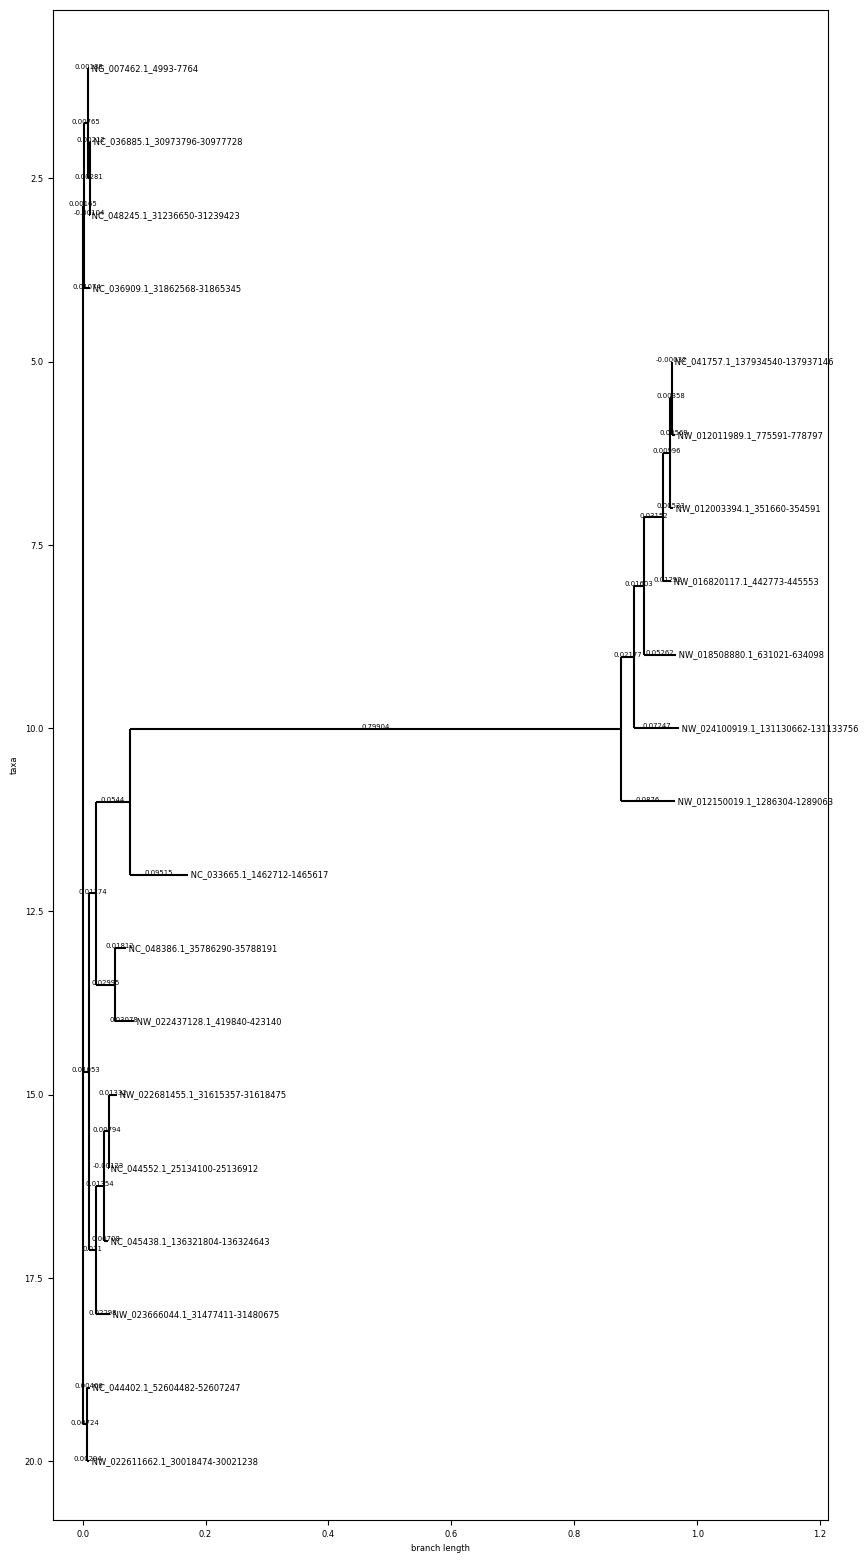

In [ ]:
# Draw the phylogenetic tree for basic set
import matplotlib

# set the size of the figure
matplotlib.rc('font', size=6)
fig = plt.figure(figsize=(10, 20), dpi=100)

axes = fig.add_subplot(1, 1, 1)
# Draw the phylogenetic tree
Phylo.draw(basic_tree, label_func=lambda x: str(x), branch_labels=lambda c: c.branch_length, axes=axes)

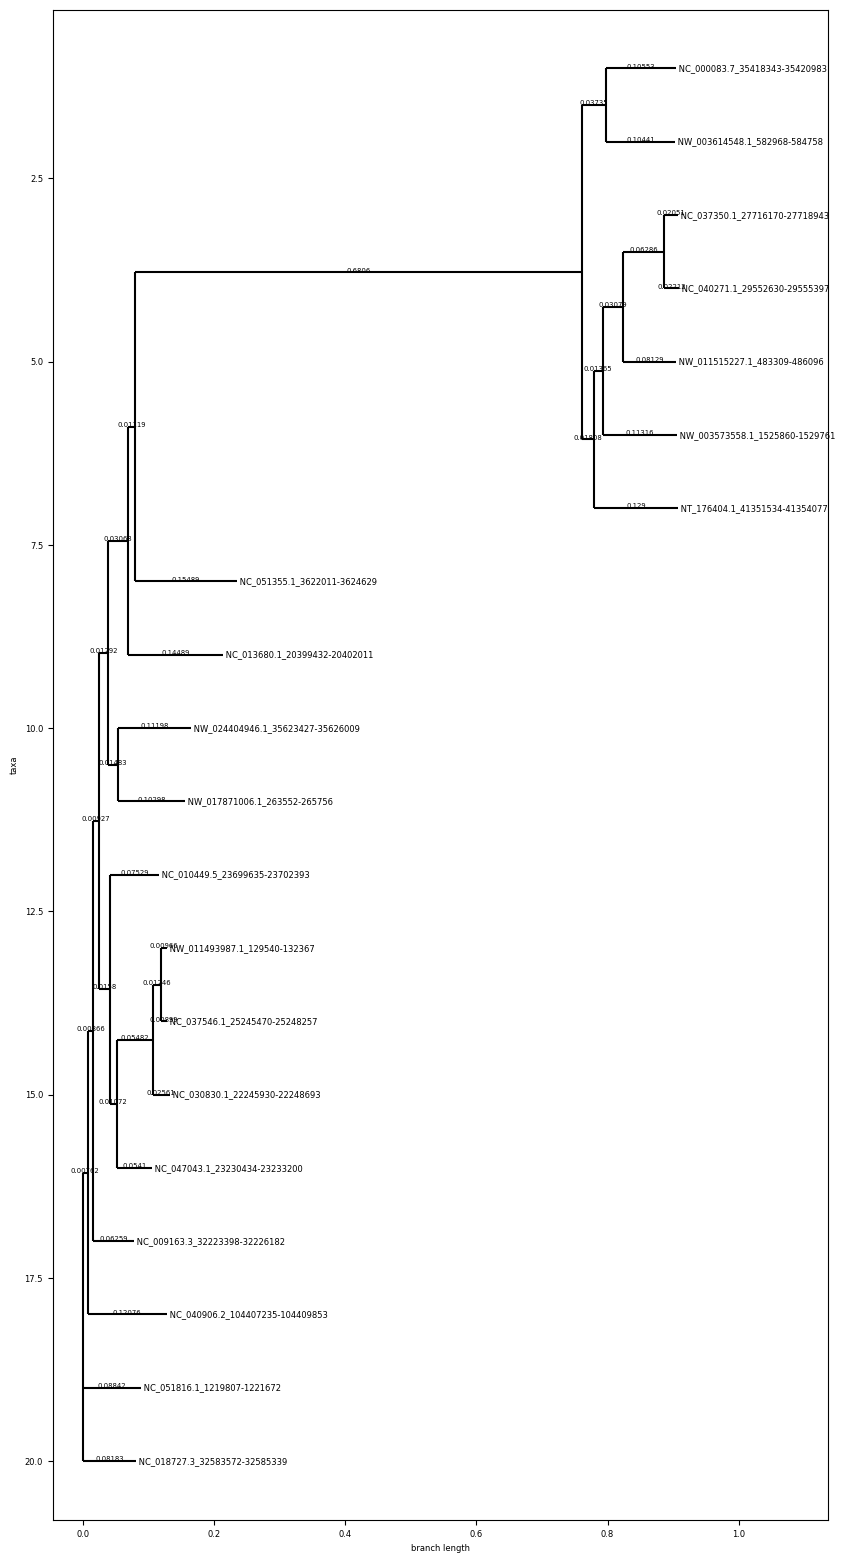

In [ ]:
# Draw the phylogenetic tree for related set
import matplotlib

# set the size of the figure
matplotlib.rc('font', size=6)
fig = plt.figure(figsize=(10, 20), dpi=100)

axes = fig.add_subplot(1, 1, 1)
# Draw the phylogenetic tree
Phylo.draw(related_tree, label_func=lambda x: str(x), branch_labels=lambda c: c.branch_length, axes=axes)

In [ ]:
# Print a region of the alignment for the basic set to show MSA
print('This is the 2521-2761bp region of the alignment for the basic set.')
for record in basic_align[:,2521:2761]:
    print(record.seq + " " + record.id)

This is the 2521-2761bp region of the alignment for the basic set.
TGGGGGTAGGGTTAGTACCGGTATGGAAGCAGTGGGGGAAATTTAAAGTT-TTGGTCTTGGGGG-AGGATGGATGGAGGTGAAAGTA-------GGGGGGTATTTTCTAGGAAATTTAAGGGTCTCAGCTTTT-------TCTTTTCTCTCTCCTCTTCAGGATCATCTTCTCGAACCCCGAGTGACAAGCCTGTAG----CCCATGTTGTAGGTAAGAGCTCTGAGGATGTGTCTTGGA NC_036885.1_30973796-30977728
TGGGGGTAGGGTTAGTACCGGTATGGAAGCAGTGGGGGAAATTTAAAGTT-TTGGTCTTGGGGG-AGGATGGATGGAGGTGAAAGTA-------GGGGGGTATTTTCTAGGAAATTTAAGGGTCTCAGCTTTT-------TCTTTTCTCTCTCCTCTTCAGGATCATCTTCTCGAACCCCGAGTGACAAGCCTGTAG----CCCATGTTGTAGGTAAGAGCTCTGAGGATGTGTCTTGGA NC_048245.1_31236650-31239423
TGGGGGTAGGGTTAGTACCGGTATGGAAGCAGTGGGGGAAATTTAAAGTT-TTGGTCTTGGGGG-AGGATGGATGGAGGTGAAAGTA-------GGGGGGTATTTTCTAGGAAGTTTAAGGGTCTCAGCTTTT-------TCTTTTCTCTCTCCTCTTCAGGATCATCTTCTCGAACCCCGAGTGACAAGCCTGTAG----CCCATGTTGTAGGTAAGAGCTCTGAGGATGTGTCTTGGA NG_007462.1_4993-7764
TGGGGGTAGGGTTAGTACCGGTATGGAAGCAGTGGGGGAAATTTAAAGTT-TTGGTCTTGGGGG-AGGATGGATGGAGGTGAAAGTA-------GGGGG-TATTTTCTAGGAAGTTTAAGGGTCTCAG

In [ ]:
# Print a region of the alignment for the related set to show MSA
print('This is the 1561-1801bp region of the alignment for the basic set.')
for record in related_align[:,1561:1801]:
    print(record.seq + " " + record.id)

This is the 1561-1801bp region of the alignment for the basic set.
ATTGAGAGAGGAAAATGTGGAGAAAGATGGGGAGGCAGAAGGAGATATGGGGAGAGAT---GGA--AGAGGGAGAGCGAGGAGCAC-ATGGAAGA---TGCTCATGGATTGCTTCTTG-----AATGAATGAATGAATGAATGATGAATGAATGAGCACGCAGACAGACATATGTAAAGA----GAGATGTGTGGAGAGATGTGGGGTGTGGGTAGAGAGATGGGGAC--AGAACAAGTG NC_051816.1_1219807-1221672
GGTGAGAGAG-AAAACGTGGAGAAAGACGGG-AGGCAGAAAGAGATGTGGAGAGCGAT---G-A--AGAGAGAAGGGACGGAGCAC-ACCAAAGG---TGCTCTCTAAGCACTTCTTG-----AATGAATGAATGAGCACACAC---ATAGACAGACAGAGAGACAGAGAGAG--AGAGA----GAGATGTGTGGAGAGATGTGGGGTGTGGGTTGAGAGATGGG--------------- NC_018727.3_32583572-32585339
AGATGGGGAGAGAACACTGGAGAAAGATGGGAAGGCAGAAAGAGAAATGGAGAGACATCAGGGA--AGAGAGAAGGATGGAGAGAT-AGAATATC---TGTCACCTGGAAGGTGCT-------AACTAAACACTTGTTGAATGA---ATGAATGAGCA-AGAGATAAACATAT--ATAAA----GAGATATGTAGAAAGATGTGGGGTGTGGGTAGAGAGATGGGAAG--AGAACCAGTG NC_040906.2_104407235-10440985
GGTGGGAGGG-AAAACTTGGAGAAAGATGGAGAGGCAGAATGAGATGTAGAGAGAGATGGAGGA--AGAGAGAGAAGGATGGACAG-ATGGGGGGGCTTGGCACATGGAAGGTGCTC----

# Build an HMM

In [ ]:
from collections import defaultdict

class HMMBuilder:
  # Add variables needed for HMM
  def __init__(self):
    self.states = []
    self.obs = []
    self.start_probs = defaultdict(lambda: 0)
    self.trans_probs = defaultdict(lambda: defaultdict(lambda: 0))
    self.emit_probs = defaultdict(lambda: defaultdict(lambda: 0))

  def add_state(self, state_name):
    self.states.append(state_name)

  def add_obs(self, obs_name):
    self.obs.append(obs_name)

  def add_start_prob(self, state_name, prob):
    self.start_probs[state_name] = prob

  def add_trans_prob(self, from_state, to_state, prob):
    self.trans_probs[from_state][to_state] = prob

  def add_emit_prob(self, state_name, obs_name, prob):
    self.emit_probs[state_name][obs_name] = prob
  
  # Pi Matrix - initial probability
  def get_pi(self):
    N = len(self.states)
    O = len(self.obs)

    pi = np.array([self.start_probs[self.states[i]] for i in range(N) ])
    return pi

  # A Matrix - transition probability
  def get_A(self):
    N = len(self.states)
    O = len(self.obs)

    A = np.zeros((N, N))
    for i in range(0, N):
      for j in range(0, N):
        A[i, j] = self.trans_probs[self.states[i]][self.states[j]]
    return A
  
  # B Matrix - emission probability
  def get_B(self):
    N = len(self.states)
    O = len(self.obs)

    B = np.zeros((N,O))
    for i in range(0, N):
      for j in range(0, O):
        B[i, j] = self.emit_probs[self.states[i]][self.obs[j]]
    return B

# Setup the HMM Model

In [ ]:
# Setup HMM Model
# Training sequences are expected to be the same length
def add_pseudocounts(L):
  epsilon = 0.01

  # If all elements are positive, there's no need to do anything
  num_zeros = np.sum(L == 0)
  if num_zeros == 0:
    return L

  # If all elements are zero, we spread equal probability to all of them
  num_non_zeros = np.sum(L != 0)
  if num_non_zeros == 0:
    L[:] = 1 / L.size
    return L

  # Subtract a bit from all non-zero probabilities
  L[L != 0] -= epsilon / num_non_zeros
  # Add that bit back to all zero probabilities
  L[L == 0] += epsilon / num_zeros

  return L

def build_alignment_HMM(training_seqs):
  # Creating a new builder
  builder = HMMBuilder()
  # Define constants
  N = len(training_seqs[0])

  # Add observations
  builder.add_obs('S')
  builder.add_obs('A')
  builder.add_obs('T')
  builder.add_obs('C')
  builder.add_obs('G')
  builder.add_obs('-')
  builder.add_obs('E')

  # Add start and end states
  builder.add_state('start')
  builder.add_emit_prob('start', 'S', 1)

  # Add start probability
  builder.add_start_prob('start', 1)

  # Add match states, delete states, and insert states at the current state
  for i in range(N):
    curr_match_state = ('match', i)
    builder.add_state(curr_match_state)

    curr_del_state = ('del', i)
    builder.add_state(curr_del_state)

    curr_insert_state = ('insert', i)
    builder.add_state(curr_insert_state)

    # Add transition probabilities
    if i == 0:
      # Transition probabilities for start states
      curr_col = training_seqs[:,i]
      del_prob = curr_col.count('-') / len(curr_col)

      # Starting in a conserved region (no delete states)
      if del_prob == 0:
        builder.add_trans_prob('start', curr_del_state, 0.01)
        builder.add_trans_prob('start', curr_match_state, 0.98)
      # Not starting in a conserved region (there will be delete states)
      else:
        builder.add_trans_prob('start', curr_del_state, del_prob - 0.005)
        builder.add_trans_prob('start', curr_match_state, 1 - del_prob - 0.005)
      builder.add_trans_prob('start', curr_insert_state, 0.01)
      builder.add_trans_prob(curr_insert_state, curr_insert_state, 0.01) # insert self loop
      builder.add_trans_prob(curr_insert_state, curr_match_state, 0.99)

    else:
      # Common case - no conserved region

      # Initialize previous state
      prev_match_state = ('match', i-1)
      prev_del_state = ('del', i-1)
      prev_insert_state = ('insert', i-1)
      curr_col = training_seqs[:,i]
      prev_col = training_seqs[:,i-1]
      
      # Initialize current number of states for each type
      match_to_match = 0
      match_to_del = 0
      del_to_match = 0
      del_to_del = 0
      
      # Keep track of how many states there are
      for j in range(len(curr_col)):
        if prev_col[j] != '-' and curr_col[j] != '-':
          match_to_match += 1
        if prev_col[j] != '-' and curr_col[j] == '-':
          match_to_del += 1
        if prev_col[j] == '-' and curr_col[j] != '-':
          del_to_match += 1
        if prev_col[j] == '-' and curr_col[j] == '-':
          del_to_del += 1
      
      # Take into account conserved regions:
      num_prev_del = prev_col.count('-')
      num_prev_match = len(prev_col) - num_prev_del

      if num_prev_del == 0:
        # Conserved regions - delete probabilities
        del_to_match_prob = 0.5
        del_to_del_prob = 0.5
      else:
        # Non-conserved regions - delete probabilities
        del_to_match_prob = del_to_match / num_prev_del
        del_to_del_prob = del_to_del / num_prev_del
     
      # Initialize transition probabilities    
      match_to_match_prob = match_to_match / num_prev_match
      match_to_del_prob = match_to_del / num_prev_match
      match_to_insert_prob = 0.01
      insert_to_insert_prob = 0.01
      insert_to_match_prob = 0.99

      # Add pseudocounts for matches and deletions
      from_match_probs = np.array([match_to_match_prob, match_to_del_prob])
      from_match_probs = add_pseudocounts(from_match_probs)
      match_to_match_prob, match_to_del_prob = from_match_probs

      from_del_probs = np.array([del_to_match_prob, del_to_del_prob])
      from_del_probs = add_pseudocounts(from_del_probs)
      del_to_match_prob, del_to_del_prob = from_del_probs

      # Add types of transition probabilities to HMM
      builder.add_trans_prob(prev_match_state, curr_match_state, match_to_match_prob - 0.005)
      builder.add_trans_prob(prev_match_state, curr_del_state, match_to_del_prob - 0.005)
      builder.add_trans_prob(prev_match_state, curr_insert_state, 0.01)
      builder.add_trans_prob(prev_del_state, curr_match_state, del_to_match_prob)
      builder.add_trans_prob(prev_del_state, curr_del_state, del_to_del_prob)
      builder.add_trans_prob(curr_insert_state, curr_insert_state, 0.01) # insert self loop
      builder.add_trans_prob(curr_insert_state, curr_match_state, 0.99)
      
      # Transition probabilities for end states
      # Also deal with the last insert state
      if i == (N-1):
        last_insert_state = ('insert', i + 1)
        builder.add_state(last_insert_state)

        builder.add_trans_prob(curr_del_state, 'end', 1)
        builder.add_trans_prob(curr_match_state, 'end', 0.99)
        builder.add_trans_prob(curr_match_state, last_insert_state, 0.01)
        builder.add_trans_prob(last_insert_state, last_insert_state, 0.01)
        builder.add_trans_prob(last_insert_state, 'end', 0.99)

        # Insert states have balanced emission probs
        builder.add_emit_prob(last_insert_state, 'A', 0.25) 
        builder.add_emit_prob(last_insert_state, 'T', 0.25)
        builder.add_emit_prob(last_insert_state, 'C', 0.25)
        builder.add_emit_prob(last_insert_state, 'G', 0.25)
    
    state = training_seqs[:,i]
    num_del = state.count('-')
    num_match = len(state) - num_del
    # Calculate emission probabilities for match states
    a_emit_prob = state.count('A') / num_match
    t_emit_prob = state.count('T') / num_match
    c_emit_prob = state.count('C') / num_match
    g_emit_prob = state.count('G') / num_match

    # Update to add pseudoprobabilities
    # Pack into an array to manipulate more easily
    emit_probs = np.array([a_emit_prob, t_emit_prob, c_emit_prob, g_emit_prob])
    emit_probs = add_pseudocounts(emit_probs)   
    # Unpack emit probs so we can add them to the HMM
    a_emit_prob, t_emit_prob, c_emit_prob, g_emit_prob = emit_probs

    builder.add_emit_prob(curr_match_state, 'A', a_emit_prob)
    builder.add_emit_prob(curr_match_state, 'T', t_emit_prob)
    builder.add_emit_prob(curr_match_state, 'C', c_emit_prob)
    builder.add_emit_prob(curr_match_state, 'G', g_emit_prob)
    builder.add_emit_prob(curr_del_state, '-', 1)
    builder.add_emit_prob(curr_insert_state, 'A', 0.25) # insert states have balanced emission probs
    builder.add_emit_prob(curr_insert_state, 'T', 0.25)
    builder.add_emit_prob(curr_insert_state, 'C', 0.25)
    builder.add_emit_prob(curr_insert_state, 'G', 0.25)
    
  # Deal with the end state
  builder.add_state('end')
  builder.add_emit_prob('end', 'E', 1)
  builder.add_trans_prob('end', 'end', 1)

  
  pi = builder.get_pi()
  A = builder.get_A()
  B = builder.get_B()

  return pi, A, B, builder

# Viterbi Algorithm to compute log-Viterbi Scores

In [ ]:
def Viterbi(target_seq, pi_matrix, A_matrix, B_matrix):
  num_states = A_matrix.shape[0]
  num_timesteps = len(target_seq)
  delta = np.zeros((num_timesteps, num_states))
  psi = np.zeros((num_timesteps, num_states), dtype=np.int32)
  psi[:] = -1

  # Initialization
  for state in range(num_states):
    log_init_prob = np.log(pi_matrix[state])
    log_init_to_emit_prob = np.log(B_matrix[state, target_seq[0]])
    delta[0, state] = log_init_prob + log_init_to_emit_prob

  for timestep, current_obs in enumerate(target_seq[1:], 1):
    # Loop over the states
    for current_state in range(num_states):
      # Calculate transition probability from any state to the current state
      log_trans_prob = np.log(A_matrix[:, current_state])
      # Calculate emission probability in current state
      log_emit_prob = np.log(B_matrix[current_state, current_obs])
      # Update viterbi score
      delta[timestep, current_state] = np.max(delta[timestep - 1, :] + log_trans_prob) + log_emit_prob

      # Keep track of the previous state that most likely led to the current state
      psi[timestep, current_state] = np.argmax(delta[timestep - 1, :] + log_trans_prob)
  score = np.max(delta[-1, :])
  # Setup backwards pass to find the most likely sequence
  most_likely_state = np.argmax(delta[-1, :])
  most_likely_sequence = [most_likely_state]

  # Intentionally stop when t=1 because there is no way to enter the start state
  for t in range(len(target_seq) - 1, 0, -1):
    most_likely_state = psi[t, most_likely_state]
    most_likely_sequence.append(most_likely_state)

  # [::-1] Slicing code to reverse a list
  return most_likely_sequence[::-1], score

# Function to translate observations to indices
def obs_to_idxs(seq, builder):
  return [builder.obs.index(c) for c in seq]

# Function to translate indices to states
def idxs_to_states(seq, builder):
  return [builder.states[i] for i in seq]

# Select the data for HMM Training

In [ ]:
# Select the data for HMM training
# Select the states (each alignment becomes a state; in this case, the columns represent the states)

# Change basic_align to related_align to test those sequences
training_data = basic_align[:,2521:2761] 
[training_data[i,:].seq for i in range(len(training_data))]

[Seq('TGGGGGTAGGGTTAGTACCGGTATGGAAGCAGTGGGGGAAATTTAAAGTT-TTG...GGA'),
 Seq('TGGGGGTAGGGTTAGTACCGGTATGGAAGCAGTGGGGGAAATTTAAAGTT-TTG...GGA'),
 Seq('TGGGGGTAGGGTTAGTACCGGTATGGAAGCAGTGGGGGAAATTTAAAGTT-TTG...GGA'),
 Seq('TGGGGGTAGGGTTAGTACCGGTATGGAAGCAGTGGGGGAAATTTAAAGTT-TTG...GGA'),
 Seq('GGGGGGTAGGGTTAGTACCAGTATGGAAGCAGTGGGGGAAATTTAAAGTT-TTG...GGA'),
 Seq('GGGGGGTAGGGTTAGTACCAGTATGGAAGCAGTGGGGGAAATTTAAAGTT-TTG...GGA'),
 Seq('GGGGTATAGGGTTAGTACTGGTACGAAAGCAGTGGGGGAAATTTAAAGTT-TTG...GGA'),
 Seq('GGGGTATAGGGTTAGTACTGGTACGAAAGCAGTGGGGGAAATTTAAAGTT-TTG...GGA'),
 Seq('GGGGTATAGGGTTAGTACTGGTACGAAAGCAGTGGGGGAAATTTAAAGTT-TTG...GGA'),
 Seq('GGGGTGTAGGGTTAGTACTGGTACGAAAGCAGTGGGGGAAATTTAAAGTT-TTG...GGA'),
 Seq('GGGGGGCAGGGTGAGTACTGGTATGGAAGTAGTGGGGGAAATTTAAAGTT-TTG...GTA'),
 Seq('GGGAGGTAGGGTTAGTATCGGTATGGAAGTAGTGGGGGAAATTTAAAGTT-TTG...GGA'),
 Seq('GGGGGAGAAG-TTAGTCCTGGGATGGAAGCAATGGGGGAA-TTTAGAGTT-TTG...AGG'),
 Seq('TGAGGGTTTGCTGGAGGGAGGGAGAGAGAGAGAGGGG--AGTC---AGT--GTG...---'),
 Seq('TGAGGGTTTGCTGG

# Train the Selected Data using the HMM Model

In [ ]:
# Train the selected data using the HMM Model
pi, A, B, builder = build_alignment_HMM(training_data)

# Code to check if pi, A, and B matrices work and sum to 1
debug = False
if debug:
  print(builder.states)

  # Check that the matrices all have rows that sum to 1
  print("pi")
  print(np.sum(pi, axis=0))
  print("A")
  print(np.sum(A, axis=1))
  print("B")
  print(np.sum(A, axis=1))


# Compute log-Viterbi Scores for Test Dataset

In [ ]:
# Compute log-Viterbi scores for the 20% of sequences that weren't used to train an HMM
# Scores are shown in the far right (scroll to see score)
for x in range(20, 25):
  # Change basic_set to related to test those sequences
  seq = "S" + basic_set[x].seq[2521:2761] + "E"
  target_seq = obs_to_idxs(seq, builder)
  most_likely_sequence, score = Viterbi(target_seq, pi, A, B)
  #print(idxs_to_states(most_likely_sequence, builder))
  print(seq, score)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


SGCCTTGGCTCAGACATGTTTTCTGTGAAAACGGAGCTGAACAATAGGCTGTTCCCACATAGCCTCCTGGCCTCTGTGCCTTCTTTTGATTATGTGTTTTTAAATATTTATCTGATTAAGTTGTCCGAACAATGCAGATCTGGTGACTGACTGTCACTCATTGCTGAGCCTCTGCTCCCCAGGGGAGTTGTGTCTGTAATCGCCCTACTATTCAGTGGCGAGAAATAAAGTTTGCTTAGAAE -756.834968878104
SGCTGTTTGATCACCTCCCACCCCTGCTGCACCCTGGAGTCCTCACTCTTCTGTTTCTGGGTGAGCACAGCTCTCTTTCTTCGGGATCTCTCCCCATTCTCCCAGGCTTCCAGGGCATAAGGGCTCTGCTCATGGAAAGAGGGTTAGGGTTATACTAAGATGCAAGGGTCCTTGACAGCCTTCCTTCCCAGCCCTCCCCTGCCCCAGGAATGCTTCATATCTTTCATGGCCTTTCCCCAGCE -798.3059443939321
SGCTTCACTGCGAATCTACTTTCTCTTTTTTCTCAGGTGTCTTCCATTTACACCAAGGGGATATTTTGAGTGTCATAATTCCCCGGGCAAGGGCGAAACTTAACCTCTCTCCACATGGAACCTTCCTGGGGTTTGTGAAACTGTGATTGTGTTATAAAAAGTGGCTCCCAGCTTGGAAGACCAGGGTGGGTACATACTGGAGACAGCCAAGAGCTGAGTATATAAAAGAGAGGGAATGTGCE -780.0651052269195
SCATGTTGCCTGGAGGCCCTTTGGGGGCTAGCGAGAAAAGAGATGAGGCTGGCATGAGCTGGGGACCCTGCCAACAGCTGTGGCTTCAAGAGTGGGGTAGCAAGGAGGTGGCGGGGCGGGTAGGGGTACGGGCAGTGGTACAGAAGGGAAGAAGGTTGTTACGCAAGGAGAAATAAAAAGGAACTTGAGAATAAAAAGGAGGGAGGAGGAAAGCA